### party 데이터의 경우

> 팀원중 한명이 직접 게임진행 

> 인벤, 아프리카 tv 스트리머, 유튜브 스트리머, 학교 앞 피시방에서 블레이드앤 소울을 플레이하는 유저들에게 질문 및 조사를 통한 정보수집 (10명 이상)

### 던전 구성

### 솔로 인스턴스던전 -- 약간 도전느낌? 45레벨 50레벨 55레벨 별 던전이 다름
                     컨텐츠가 다를수도? 약간 도전형식. 던전 입장시 회복아이템 사용 불가, 안죽는게 아닌 시간내에 게임을 완료해야 클리어
                     

> 4인파티 -- 일반 던전 숙련던전

>6인파티 -- 일반던전 숙련던전

>일반던전 보통 10분 걸리고 숙련던전은 15분 걸림

>>==== 보통 6인파티 일반 --> 6인파티 숙련 --> 4인파티를 함


>12인파티 -- 라이트 레이드, 밤의 바람평야

>24인파티 -- 레이드


>레이드는 40분 이상 잡아먹음
 -- 출처: 유튜버 아프리카 스트리머, 인벤
 
 
## 파티 관련해서 생각해 볼것들

### 사회적 측면?

>겹치는 사람이 많을 수록 던전을 도는 목적이 (완료 + 다른 유저간의 친목?) 사회적 관계성 증가 --> ?

>겹치는 사람이 없고 항상 어떤 던전을 완수하기 위해 도는 사람들 (던전 완료 목적)



>>1). 일단 이파티가 유효한 파티인지? 부터 생각하기 --> 던전 1회를 돌앗는지? 최소 10분이상 걸림(일반 던전기준).

>>2). 20분이 넘어가면 던전을 2번 돌았다고 가정할 수 있을까?  만약 파티원이 6명 이상이라면 도중에 교체되서 던전을 2번 이상 돌았다고 가정가능한가?

>>3). 겹치는 사람이 많을수록 사회적 유대감이 쌓여 이탈이 방지될까?

>>4). 파티 결성 시간대도 고려해보기

>>5). 만약 파티원수가 겁나게 많은데 하루넘었음. 유효한 파티 + 던전 많이 돌았을라나?

>>6). 파티의 맨앞사람이 파티 최초 결성자일지? 그러면 뭐가 있지 않을까? 맨앞사람이 주로 누구인지 빈도체크


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [189]:
from pprint import pprint

In [179]:
from scipy.stats import kstest
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from itertools import combinations
from sklearn.preprocessing import QuantileTransformer

In [137]:
train_activity=pd.read_csv('../transformed/real_only_activity_int.csv')
test_activity=pd.read_csv('../transformed/test_real_datas_int.csv')

train_party=pd.read_csv('../lite_data/train_party_lite.csv')
test_party=pd.read_csv('../lite_data/test_party_lite.csv')

train_label=pd.read_csv('../lite_data/train_label_lite.csv')

   ## party_members_acc_id 내에 있는 유저 명단을 토대로 train, test 유저별 파티 활동 참여횟수 구하기
   > 나머지 조건은 x

In [16]:
def convert_party(train_party,test_party,train_activity,test_activity):     
    
    train_party=pd.concat([train_party,test_party],axis=0)
    train_party=train_party.drop_duplicates()
    train_party.loc[ (train_party['party_start_day']==1) & (pd.to_timedelta(train_party['party_start_time'])<pd.Timedelta(8,'h')),'party_start_week']+=-1
    
    
    
    train_party_1=train_party[train_party.party_start_week==1]
    train_party_2=train_party[train_party.party_start_week==2]
    train_party_3=train_party[train_party.party_start_week==3]
    train_party_4=train_party[train_party.party_start_week==4]
    train_party_5=train_party[train_party.party_start_week==5]
    train_party_6=train_party[train_party.party_start_week==6]
    train_party_7=train_party[train_party.party_start_week==7]
    train_party_8=train_party[train_party.party_start_week==8]
    
    #1주
    a=[i.split(',') for i in train_party_1.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_1=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt'])
    party_1['wk']=1
    party_1_train=party_1[party_1.new_id.str.contains('tr')]
    party_1_test=party_1[party_1.new_id.str.contains('te')]
    
    #2주
    a=[ i.split(',') for i in train_party_2.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_2=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt'])
    party_2['wk']=2
    party_2_train=party_2[party_2.new_id.str.contains('tr')]
    party_2_test=party_2[party_2.new_id.str.contains('te')]
    #3주
    a=[ i.split(',') for i in train_party_3.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_3=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt'])
    party_3['wk']=3
    party_3_train=party_3[party_3.new_id.str.contains('tr')]
    party_3_test=party_3[party_3.new_id.str.contains('te')]
    
    #4주
    a=[ i.split(',') for i in train_party_4.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_4=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt'])
    party_4['wk']=4
    party_4_train=party_4[party_4.new_id.str.contains('tr')]
    party_4_test=party_4[party_4.new_id.str.contains('te')]
    
    #5주
    a=[ i.split(',') for i in train_party_5.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_5=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt'])
    party_5['wk']=5
    party_5_train=party_5[party_5.new_id.str.contains('tr')]
    party_5_test=party_5[party_5.new_id.str.contains('te')]

    
    #6주
    a=[ i.split(',') for i in train_party_6.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_6=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt'])
    party_6['wk']=6
    party_6_train=party_6[party_6.new_id.str.contains('tr')]
    party_6_test=party_6[party_6.new_id.str.contains('te')]

    #7주
    a=[ i.split(',') for i in train_party_7.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_7=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt'])
    party_7['wk']=7
    party_7_train=party_7[party_7.new_id.str.contains('tr')]
    party_7_test=party_7[party_7.new_id.str.contains('te')]
  

    #8주
    a=[ i.split(',') for i in train_party_8.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_8=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt'])
    party_8['wk']=8
    party_8_train=party_8[party_8.new_id.str.contains('tr')]
    party_8_test=party_8[party_8.new_id.str.contains('te')]
    
    party_total_train=pd.concat([party_1_train,party_2_train,party_3_train,party_4_train,
                                party_5_train,party_6_train,party_7_train,party_8_train],axis=0)
    party_total_test=pd.concat([party_1_test,party_2_test,party_3_test,party_4_test,
                            party_5_test,party_6_test,party_7_test,party_8_test],axis=0)
    
    result1=pd.merge(train_activity,party_total_train,on=['new_id','wk'],how='inner').fillna(0)
    result2=pd.merge(test_activity,party_total_test,on=['new_id','wk'],how='inner').fillna(0)
    
    return result1, result2
    


In [17]:
convert_party1,convert_party2=convert_party(train_party,test_party,train_activity,test_activity)

In [18]:
merge_party=pd.merge(convert_party1,train_label,on='new_id')

In [19]:
merge_party.head(10)

,new_id,wk,party_cnt,label
0,tr1,8,3,week
1,tr2,5,68,retained
2,tr2,6,95,retained
3,tr2,8,29,retained
4,tr3,8,51,week
5,tr4,1,69,retained
6,tr4,2,63,retained
7,tr4,3,73,retained
8,tr4,4,62,retained
9,tr4,5,58,retained


   ## 스트리머, 유튜버에 따르면 한 던전 클리어를 하는데 최소 8분이 걸린다고 정보를 얻음
    
    
   > 위의 조건에 따라 파티 지속 시간이 8분 이상인 경우 던전을 한번이상 돌았다고 판단 후에 집계

In [42]:
def convert_party_over8(train_party,test_party,train_activity,test_activity): 
    
    
    
    train_party=pd.concat([train_party,test_party],axis=0)
    train_party=train_party.drop_duplicates()
    train_party['due']=(train_party.party_end_week*7+train_party.party_end_day)-(train_party.party_start_week*7+train_party.party_start_day)
    train_party['duetime']=pd.to_timedelta(train_party.due,unit='d')+pd.to_timedelta(train_party.party_end_time)-pd.to_timedelta(train_party.party_start_time)
    
    train_party=train_party[train_party.duetime>pd.Timedelta(8,unit='m')]  #파티가 8분 이상 지속
    
    train_party.loc[ (train_party['party_start_day']==1) & (pd.to_timedelta(train_party['party_start_time'])<pd.Timedelta(8,'h')),'party_start_week']+=-1
    
    
    
    train_party_1=train_party[train_party.party_start_week==1]
    train_party_2=train_party[train_party.party_start_week==2]
    train_party_3=train_party[train_party.party_start_week==3]
    train_party_4=train_party[train_party.party_start_week==4]
    train_party_5=train_party[train_party.party_start_week==5]
    train_party_6=train_party[train_party.party_start_week==6]
    train_party_7=train_party[train_party.party_start_week==7]
    train_party_8=train_party[train_party.party_start_week==8]
    
    #1주
    a=[i.split(',') for i in train_party_1.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_1=pd.DataFrame(list(z.items()),columns=['new_id','party_over8_cnt'])
    party_1['wk']=1
    party_1_train=party_1[party_1.new_id.str.contains('tr')]
    party_1_test=party_1[party_1.new_id.str.contains('te')]
    
    #2주
    a=[ i.split(',') for i in train_party_2.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_2=pd.DataFrame(list(z.items()),columns=['new_id','party_over8_cnt'])
    party_2['wk']=2
    party_2_train=party_2[party_2.new_id.str.contains('tr')]
    party_2_test=party_2[party_2.new_id.str.contains('te')]
    #3주
    a=[ i.split(',') for i in train_party_3.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_3=pd.DataFrame(list(z.items()),columns=['new_id','party_over8_cnt'])
    party_3['wk']=3
    party_3_train=party_3[party_3.new_id.str.contains('tr')]
    party_3_test=party_3[party_3.new_id.str.contains('te')]
    
    #4주
    a=[ i.split(',') for i in train_party_4.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_4=pd.DataFrame(list(z.items()),columns=['new_id','party_over8_cnt'])
    party_4['wk']=4
    party_4_train=party_4[party_4.new_id.str.contains('tr')]
    party_4_test=party_4[party_4.new_id.str.contains('te')]
    
    #5주
    a=[ i.split(',') for i in train_party_5.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_5=pd.DataFrame(list(z.items()),columns=['new_id','party_over8_cnt'])
    party_5['wk']=5
    party_5_train=party_5[party_5.new_id.str.contains('tr')]
    party_5_test=party_5[party_5.new_id.str.contains('te')]

    
    #6주
    a=[ i.split(',') for i in train_party_6.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_6=pd.DataFrame(list(z.items()),columns=['new_id','party_over8_cnt'])
    party_6['wk']=6
    party_6_train=party_6[party_6.new_id.str.contains('tr')]
    party_6_test=party_6[party_6.new_id.str.contains('te')]

    #7주
    a=[ i.split(',') for i in train_party_7.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_7=pd.DataFrame(list(z.items()),columns=['new_id','party_over8_cnt'])
    party_7['wk']=7
    party_7_train=party_7[party_7.new_id.str.contains('tr')]
    party_7_test=party_7[party_7.new_id.str.contains('te')]
  

    #8주
    a=[ i.split(',') for i in train_party_8.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_8=pd.DataFrame(list(z.items()),columns=['new_id','party_over8_cnt'])
    party_8['wk']=8
    party_8_train=party_8[party_8.new_id.str.contains('tr')]
    party_8_test=party_8[party_8.new_id.str.contains('te')]
    
    party_total_train=pd.concat([party_1_train,party_2_train,party_3_train,party_4_train,
                                party_5_train,party_6_train,party_7_train,party_8_train],axis=0)
    party_total_test=pd.concat([party_1_test,party_2_test,party_3_test,party_4_test,
                            party_5_test,party_6_test,party_7_test,party_8_test],axis=0)
    
    result1=pd.merge(train_activity,party_total_train,on=['new_id','wk'],how='inner').fillna(0)
    result2=pd.merge(test_activity,party_total_test,on=['new_id','wk'],how='inner').fillna(0)
    
    return result1, result2
    


In [43]:
convert_party_over1,convert_party_over2=convert_party_over8(train_party,test_party,train_activity,test_activity)

In [44]:
merge_party_over=pd.merge(convert_party_over1,train_label,on='new_id')

In [45]:
merge_party_over.head(10)

,new_id,wk,party_over8_cnt,label
0,tr2,5,5,retained
1,tr2,6,10,retained
2,tr2,8,28,retained
3,tr3,8,1,week
4,tr4,1,55,retained
5,tr4,2,53,retained
6,tr4,3,65,retained
7,tr4,4,52,retained
8,tr4,5,45,retained
9,tr4,6,15,retained


   ### 일반, 숙련던전의 경우 6인파티가 일반적임
    
   > 6인이상 8분 이상 파티가 지속된 경우 풀파티를 결성해서 던전을 돌았다고 가정 후에 집계

In [54]:
def convert_full_party(train_party,test_party,train_activity,test_activity): 
    
    # 일반, 숙련던전의 경우 6인파티가 일반적임
    
    # 6인이상 8분 이상 파티가 지속된 경우 풀파티를 결성해서 던전을 돌았다고 가정 후에 집계
    
    train_party=pd.concat([train_party,test_party],axis=0)
    train_party=train_party.drop_duplicates()
    train_party['due']=(train_party.party_end_week*7+train_party.party_end_day)-(train_party.party_start_week*7+train_party.party_start_day)
    train_party['duetime']=pd.to_timedelta(train_party.due,unit='d')+pd.to_timedelta(train_party.party_end_time)-pd.to_timedelta(train_party.party_start_time)
    
    train_party['member_number']=train_party.party_members_acc_id.str.count(',')+1
    train_party=train_party[train_party.member_number>=6] #6명 이상
    train_party=train_party[train_party.duetime>pd.Timedelta(8,unit='m')]# 8분 이상
    
    train_party.loc[ (train_party['party_start_day']==1) & (pd.to_timedelta(train_party['party_start_time'])<pd.Timedelta(8,'h')),'party_start_week']+=-1
    
    
    
    train_party_1=train_party[train_party.party_start_week==1]
    train_party_2=train_party[train_party.party_start_week==2]
    train_party_3=train_party[train_party.party_start_week==3]
    train_party_4=train_party[train_party.party_start_week==4]
    train_party_5=train_party[train_party.party_start_week==5]
    train_party_6=train_party[train_party.party_start_week==6]
    train_party_7=train_party[train_party.party_start_week==7]
    train_party_8=train_party[train_party.party_start_week==8]
    
    #1주
    a=[i.split(',') for i in train_party_1.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_1=pd.DataFrame(list(z.items()),columns=['new_id','full_party_cnt'])
    party_1['wk']=1
    party_1_train=party_1[party_1.new_id.str.contains('tr')]
    party_1_test=party_1[party_1.new_id.str.contains('te')]
    
    #2주
    a=[ i.split(',') for i in train_party_2.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_2=pd.DataFrame(list(z.items()),columns=['new_id','full_party_cnt'])
    party_2['wk']=2
    party_2_train=party_2[party_2.new_id.str.contains('tr')]
    party_2_test=party_2[party_2.new_id.str.contains('te')]
    #3주
    a=[ i.split(',') for i in train_party_3.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_3=pd.DataFrame(list(z.items()),columns=['new_id','full_party_cnt'])
    party_3['wk']=3
    party_3_train=party_3[party_3.new_id.str.contains('tr')]
    party_3_test=party_3[party_3.new_id.str.contains('te')]
    
    #4주
    a=[ i.split(',') for i in train_party_4.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_4=pd.DataFrame(list(z.items()),columns=['new_id','full_party_cnt'])
    party_4['wk']=4
    party_4_train=party_4[party_4.new_id.str.contains('tr')]
    party_4_test=party_4[party_4.new_id.str.contains('te')]
    
    #5주
    a=[ i.split(',') for i in train_party_5.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_5=pd.DataFrame(list(z.items()),columns=['new_id','full_party_cnt'])
    party_5['wk']=5
    party_5_train=party_5[party_5.new_id.str.contains('tr')]
    party_5_test=party_5[party_5.new_id.str.contains('te')]

    
    #6주
    a=[ i.split(',') for i in train_party_6.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_6=pd.DataFrame(list(z.items()),columns=['new_id','full_party_cnt'])
    party_6['wk']=6
    party_6_train=party_6[party_6.new_id.str.contains('tr')]
    party_6_test=party_6[party_6.new_id.str.contains('te')]

    #7주
    a=[ i.split(',') for i in train_party_7.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_7=pd.DataFrame(list(z.items()),columns=['new_id','full_party_cnt'])
    party_7['wk']=7
    party_7_train=party_7[party_7.new_id.str.contains('tr')]
    party_7_test=party_7[party_7.new_id.str.contains('te')]
  

    #8주
    a=[ i.split(',') for i in train_party_8.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_8=pd.DataFrame(list(z.items()),columns=['new_id','full_party_cnt'])
    party_8['wk']=8
    party_8_train=party_8[party_8.new_id.str.contains('tr')]
    party_8_test=party_8[party_8.new_id.str.contains('te')]
    
    party_total_train=pd.concat([party_1_train,party_2_train,party_3_train,party_4_train,
                                party_5_train,party_6_train,party_7_train,party_8_train],axis=0)
    party_total_test=pd.concat([party_1_test,party_2_test,party_3_test,party_4_test,
                            party_5_test,party_6_test,party_7_test,party_8_test],axis=0)
    
    result1=pd.merge(train_activity,party_total_train,on=['new_id','wk'],how='inner').fillna(0)
    result2=pd.merge(test_activity,party_total_test,on=['new_id','wk'],how='inner').fillna(0)
    
    return result1, result2
    


In [55]:
con1,con2=convert_full_party(train_party,test_party,train_activity,test_activity)

In [56]:
merge_full=pd.merge(con1,train_label,on='new_id')

 ## 6인파티에서 더 나아가 일부 숙련자들은 4인팟으로 던전을 돈다고 정보를 얻음.
   > 4인파티 8분 이상 파티가 지속된 경우
   
   > 4인 던전 돌았을거라 추정

In [80]:
def convert_4_party(train_party,test_party,train_activity,test_activity): 

    
    train_party=pd.concat([train_party,test_party],axis=0)
    train_party=train_party.drop_duplicates()
    train_party['due']=(train_party.party_end_week*7+train_party.party_end_day)-(train_party.party_start_week*7+train_party.party_start_day)
    train_party['duetime']=pd.to_timedelta(train_party.due,unit='d')+pd.to_timedelta(train_party.party_end_time)-pd.to_timedelta(train_party.party_start_time)
    
    train_party['member_number']=train_party.party_members_acc_id.str.count(',')+1
    train_party=train_party[train_party.member_number==4] #딱 4명의 파티
    train_party=train_party[train_party.duetime>pd.Timedelta(8,unit='m')]# 8분 이상
    
    train_party.loc[ (train_party['party_start_day']==1) & (pd.to_timedelta(train_party['party_start_time'])<pd.Timedelta(8,'h')),'party_start_week']+=-1
    train_party_1=train_party[train_party.party_start_week==1]
    train_party_2=train_party[train_party.party_start_week==2]
    train_party_3=train_party[train_party.party_start_week==3]
    train_party_4=train_party[train_party.party_start_week==4]
    train_party_5=train_party[train_party.party_start_week==5]
    train_party_6=train_party[train_party.party_start_week==6]
    train_party_7=train_party[train_party.party_start_week==7]
    train_party_8=train_party[train_party.party_start_week==8]
    
    #1주
    a=[i.split(',') for i in train_party_1.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_1=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt_4'])
    party_1['wk']=1
    party_1_train=party_1[party_1.new_id.str.contains('tr')]
    party_1_test=party_1[party_1.new_id.str.contains('te')]
    
    #2주
    a=[ i.split(',') for i in train_party_2.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_2=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt_4'])
    party_2['wk']=2
    party_2_train=party_2[party_2.new_id.str.contains('tr')]
    party_2_test=party_2[party_2.new_id.str.contains('te')]
    #3주
    a=[ i.split(',') for i in train_party_3.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_3=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt_4'])
    party_3['wk']=3
    party_3_train=party_3[party_3.new_id.str.contains('tr')]
    party_3_test=party_3[party_3.new_id.str.contains('te')]
    
    #4주
    a=[ i.split(',') for i in train_party_4.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_4=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt_4'])
    party_4['wk']=4
    party_4_train=party_4[party_4.new_id.str.contains('tr')]
    party_4_test=party_4[party_4.new_id.str.contains('te')]
    
    #5주
    a=[ i.split(',') for i in train_party_5.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_5=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt_4'])
    party_5['wk']=5
    party_5_train=party_5[party_5.new_id.str.contains('tr')]
    party_5_test=party_5[party_5.new_id.str.contains('te')]

    
    #6주
    a=[ i.split(',') for i in train_party_6.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_6=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt_4'])
    party_6['wk']=6
    party_6_train=party_6[party_6.new_id.str.contains('tr')]
    party_6_test=party_6[party_6.new_id.str.contains('te')]

    #7주
    a=[ i.split(',') for i in train_party_7.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_7=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt_4'])
    party_7['wk']=7
    party_7_train=party_7[party_7.new_id.str.contains('tr')]
    party_7_test=party_7[party_7.new_id.str.contains('te')]
  

    #8주
    a=[ i.split(',') for i in train_party_8.party_members_acc_id ]
    flatten=[u for k in a for u in k]
    z=dict()
    for i in flatten:
        if i in z:
            z[i]+=1
        else: 
            z[i]=1
    party_8=pd.DataFrame(list(z.items()),columns=['new_id','party_cnt_4'])
    party_8['wk']=8
    party_8_train=party_8[party_8.new_id.str.contains('tr')]
    party_8_test=party_8[party_8.new_id.str.contains('te')]
    
    party_total_train=pd.concat([party_1_train,party_2_train,party_3_train,party_4_train,
                                party_5_train,party_6_train,party_7_train,party_8_train],axis=0)
    party_total_test=pd.concat([party_1_test,party_2_test,party_3_test,party_4_test,
                            party_5_test,party_6_test,party_7_test,party_8_test],axis=0)
    
    result1=pd.merge(train_activity,party_total_train,on=['new_id','wk'],how='inner').fillna(0)
    result2=pd.merge(test_activity,party_total_test,on=['new_id','wk'],how='inner').fillna(0)
    
    return result1, result2
    


In [81]:
con3,con4=convert_4_party(train_party,test_party,train_activity,test_activity)

In [83]:
merge_4=pd.merge(con3,train_label,on='new_id')

## train_party, test_party 데이터 내에 명단을 보면 유저id 순서가 뒤죽박죽임.

> 어떤 경우 해당유저가 맨 앞에 있을 수도, 다른 파티에서는 중간에 있는 경우도 확인하여 파티 명단은 이름순이 아닐 것이라 판단.

> party_members_acc_id 명단에 유저가 가장 맨앞에 있는 경우에, 그 해당 파티를 가장 처음으로 생성했다고 판단 후에 집계

In [93]:
def cnt_first_partylist(train_party,test_party,train_activity,test_activity): 

    
# train_party, test_party 데이터 내에 명단을 보면 뒤죽박죽임.
##어떤 경우 해당유저가 맨 앞에 있을 수도, 다른 파티에서는 중간에 있는 경우도 확인하여 파티 명단은 이름순이 아닐 것이라 판단.

### party_members_acc_id 명단에 유저가 가장 맨앞에 있는 경우에, 그 해당 파티를 가장 처음으로 생성했다고 판단 후에 집계
    
    train_party=pd.concat([train_party,test_party],axis=0)
    train_party=train_party.drop_duplicates()
    train_party.loc[ (train_party['party_start_day']==1) & (pd.to_timedelta(train_party['party_start_time'])<pd.Timedelta(8,'h')),'party_start_week']+=-1
    train_party_1=train_party[train_party.party_start_week==1]
    train_party_2=train_party[train_party.party_start_week==2]
    train_party_3=train_party[train_party.party_start_week==3]
    train_party_4=train_party[train_party.party_start_week==4]
    train_party_5=train_party[train_party.party_start_week==5]
    train_party_6=train_party[train_party.party_start_week==6]
    train_party_7=train_party[train_party.party_start_week==7]
    train_party_8=train_party[train_party.party_start_week==8]  
    #1주
    li=[]
    for i in train_party_1.party_members_acc_id.str.split(','):
        li.append(i[0])
    z={}
    for i in li:
       if i in z:
        z[i]+=1
       else:
        z[i]=1

    party_1=pd.DataFrame(list(z.items()),columns=['new_id','party_first_cnt'])
    party_1['wk']=1
    party_1_train=party_1[party_1.new_id.str.contains('tr')]
    party_1_test=party_1[party_1.new_id.str.contains('te')]
    
    #2주
    li=[]
    for i in train_party_2.party_members_acc_id.str.split(','):
        li.append(i[0])
    z={}
    for i in li:
       if i in z:
        z[i]+=1
       else:
        z[i]=1

    party_2=pd.DataFrame(list(z.items()),columns=['new_id','party_first_cnt'])
    party_2['wk']=2
    party_2_train=party_2[party_2.new_id.str.contains('tr')]
    party_2_test=party_2[party_2.new_id.str.contains('te')]
    
    #3주
    li=[]
    for i in train_party_3.party_members_acc_id.str.split(','):
        li.append(i[0])
    z={}
    for i in li:
       if i in z:
        z[i]+=1
       else:
        z[i]=1

    party_3=pd.DataFrame(list(z.items()),columns=['new_id','party_first_cnt'])
    party_3['wk']=3
    party_3_train=party_3[party_3.new_id.str.contains('tr')]
    party_3_test=party_3[party_3.new_id.str.contains('te')]

    #4주
    li=[]

    for i in train_party_4.party_members_acc_id.str.split(','):
        li.append(i[0])
    z={}
    
    for i in li:
       if i in z:
        z[i]+=1
       else:
        z[i]=1

    party_4=pd.DataFrame(list(z.items()),columns=['new_id','party_first_cnt'])
    party_4['wk']=4
    party_4_train=party_4[party_4.new_id.str.contains('tr')]
    party_4_test=party_4[party_4.new_id.str.contains('te')]

    #5주
    li=[]

    for i in train_party_5.party_members_acc_id.str.split(','):
        li.append(i[0])
    z={}
    
    for i in li:
       if i in z:
        z[i]+=1
       else:
        z[i]=1

    party_5=pd.DataFrame(list(z.items()),columns=['new_id','party_first_cnt'])
    party_5['wk']=5
    party_5_train=party_5[party_5.new_id.str.contains('tr')]
    party_5_test=party_5[party_5.new_id.str.contains('te')]

    
    #6주
    li=[]

    for i in train_party_6.party_members_acc_id.str.split(','):
        li.append(i[0])
    z={}
    
    for i in li:
       if i in z:
        z[i]+=1
       else:
        z[i]=1

    party_6=pd.DataFrame(list(z.items()),columns=['new_id','party_first_cnt'])
    party_6['wk']=6
    party_6_train=party_6[party_6.new_id.str.contains('tr')]
    party_6_test=party_6[party_6.new_id.str.contains('te')]

    #7주
    li=[]

    for i in train_party_7.party_members_acc_id.str.split(','):
        li.append(i[0])
    z={}
    
    for i in li:
       if i in z:
        z[i]+=1
       else:
        z[i]=1

    party_7=pd.DataFrame(list(z.items()),columns=['new_id','party_first_cnt'])
    party_7['wk']=7
    party_7_train=party_7[party_7.new_id.str.contains('tr')]
    party_7_test=party_7[party_7.new_id.str.contains('te')]
  

    #8주
    li=[]

    for i in train_party_8.party_members_acc_id.str.split(','):
        li.append(i[0])
    z={}
    
    for i in li:
       if i in z:
        z[i]+=1
       else:
        z[i]=1

    party_8=pd.DataFrame(list(z.items()),columns=['new_id','party_first_cnt'])
    party_8['wk']=8
    party_8_train=party_8[party_8.new_id.str.contains('tr')]
    party_8_test=party_8[party_8.new_id.str.contains('te')]
# 최종merge
    party_total_train=pd.concat([party_1_train,party_2_train,party_3_train,party_4_train,
                                party_5_train,party_6_train,party_7_train,party_8_train],axis=0)
    party_total_test=pd.concat([party_1_test,party_2_test,party_3_test,party_4_test,
                            party_5_test,party_6_test,party_7_test,party_8_test],axis=0)
    
    result1=pd.merge(train_activity,party_total_train,on=['new_id','wk'],how='inner').fillna(0)
    result2=pd.merge(test_activity,party_total_test,on=['new_id','wk'],how='inner').fillna(0)
    
    return result1, result2
    


In [106]:
merge_first=pd.merge(first_time,train_label,on='new_id')

### 블레이드 앤 소울은 만렙 컨텐츠 위주의 게임.

> 자료 조사중 파티 결성 후에도 스펙이 되지 않는 유저는 해당 파티에서 제명되거나 강퇴되는 경우가 발생한다는 정보

> 실제 던전을 돈 횟수와 파티 참여활동 횟수간의 차이를 구하면 클래스 별로 분포가 다를 것이라 판단하고 진행

In [138]:
def difference(train_party,test_party,train_activity,test_activity): 
    
    #유저별 파티 참여횟수와 실제로 던전을 돈 횟수 차이
    
    #앞에서 만든 함수를 이용해 변환
    c,d=convert_party(train_party,test_party,train_activity,test_activity)
    
    result1=c.loc[:,['new_id','wk','party_cnt','partybattle_cnt','cnt_enter_inzone_light','cnt_enter_inzone_normal','cnt_enter_inzone_skilled','cnt_enter_raid','cnt_enter_raid_light','cnt_enter_bam']]
    result2=d.loc[:,['new_id','wk','party_cnt','partybattle_cnt','cnt_enter_inzone_light','cnt_enter_inzone_normal','cnt_enter_inzone_skilled','cnt_enter_raid','cnt_enter_raid_light','cnt_enter_bam']]
    
    result1['differ']=result1.party_cnt-(result1.partybattle_cnt+result1.cnt_enter_bam+result1.cnt_enter_inzone_light+result1.cnt_enter_inzone_normal+result1.cnt_enter_inzone_skilled+result1.cnt_enter_raid+result1.cnt_enter_raid_light)
    result2['differ']=result2.party_cnt-(result2.partybattle_cnt+result2.cnt_enter_bam+result2.cnt_enter_inzone_light+result2.cnt_enter_inzone_normal+result2.cnt_enter_inzone_skilled+result2.cnt_enter_raid+result2.cnt_enter_raid_light)
    
    ultimate_train=result1.loc[:,['new_id','wk','differ']]
    ultimate_test=result2.loc[:,['new_id','wk','differ']]
    
    return ultimate_train,ultimate_test
    
    
    

In [139]:
diff1,diff2=difference(train_party,test_party,train_activity,test_activity)

In [140]:
diff1

,new_id,wk,differ
0,tr1,8,3
1,tr2,5,65
2,tr2,6,83
3,tr2,8,-35
4,tr3,8,47
5,tr4,1,-88
6,tr4,2,-92
7,tr4,3,-106
8,tr4,4,-97
9,tr4,5,-19


In [141]:
merge_diff=pd.merge(diff1,train_label,on='new_id')

In [122]:
m1=pd.merge(merge_party,merge_party_over,on=['new_id','wk','label'],how='outer').fillna(0)

In [124]:
m2=pd.merge(m1,merge_full,on=['new_id','wk','label'],how='outer').fillna(0)

In [125]:
m3=pd.merge(m2,merge_4,on=['new_id','wk','label'],how='outer').fillna(0)

In [126]:
m4=pd.merge(m3,merge_first,on=['new_id','wk','label'],how='outer').fillna(0)

In [154]:
m5=pd.merge(m3,merge_diff,on=['new_id','wk','label'],how='outer').fillna(0)

## 집단별 상관관계 그리기

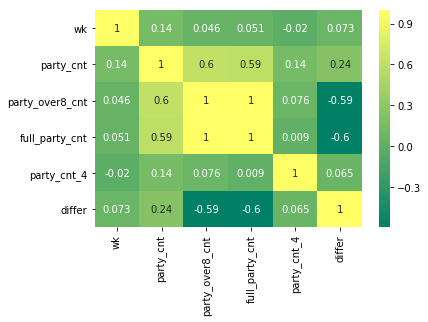

In [158]:
sns.heatmap(m5.corr(),annot=True,cmap='summer')

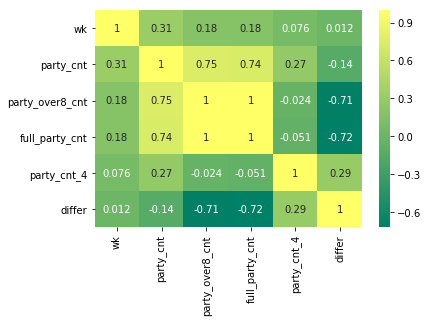

In [159]:
sns.heatmap(m5[m5.label=='week'].corr(),annot=True,cmap='summer')

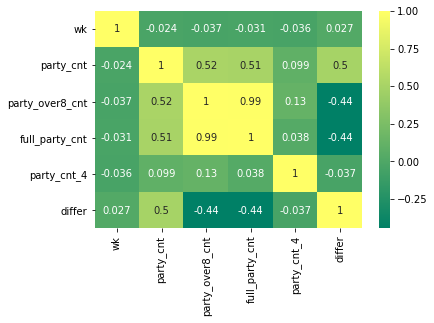

In [160]:
sns.heatmap(m5[m5.label=='retained'].corr(),annot=True,cmap='summer')

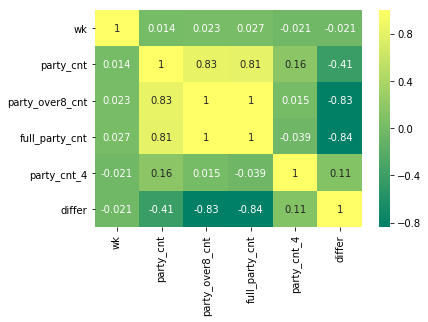

In [161]:
sns.heatmap(m5[m5.label=='2month'].corr(),annot=True,cmap='summer')

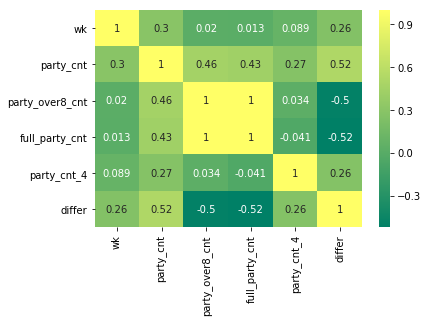

In [162]:
sns.heatmap(m5[m5.label=='month'].corr(),annot=True,cmap='summer')

In [177]:
def new_variable_checker(total, var):
    
    col_name = var.name
#     #### 표준화
#     var = (var - var.mean())/var.std()
    
    df = total.loc[:,('label',col_name)]
    #### rank transformation
    q_t = QuantileTransformer()
    df[col_name] = pd.Series(q_t.fit_transform(df[col_name].values.reshape(-1, 1)).reshape(-1),name = col_name)
    
    #### 검정을 위한 표 만들기

    table = df.pivot(columns='label',values = col_name)
    table = pd.concat((table['retained'].dropna().reset_index(drop = True),
               table['2month'].dropna().reset_index(drop = True),
               table['month'].dropna().reset_index(drop = True),
               table['week'].dropna().reset_index(drop = True)),axis = 1)
    
    #### 정규성 검정
    _, n_0 = kstest(table['retained'],'norm')
    _, n_1 = kstest(table['2month'],'norm')
    _, n_2 = kstest(table['month'],'norm')
    _, n_3 = kstest(table['week'],'norm')
    
    #### box plot
    table.plot.box()
    
    ##### 네 집단 사이의 평균검정.
    
    if (n_0 <0.05) and (n_1 <0.05) and (n_2 <0.05) and (n_3 <0.05): 
        pprint("변수 %s는 정규성을 가정할 수 없습니다."%col_name)
        print(n_0,n_1,n_2,n_3)
        print()
        s, p = kruskal(table['retained'],table['2month'],table['month'],table['week'])
    
        if p >= 0.1: # 차이 없음
            pprint('통계적으로 네 집단의 차이가 유의하지 않음.')
            return
        else:
            pprint('통계적으로 네 집단의 차이가 유의함.')
            
        #### Mahn-whiteney검정
        mw_result = []
        for c1, c2 in combinations(table.columns,2):
            u, p = mannwhitneyu(table[c1],table[c2],alternative='two-sided')
            mw_result.append((c1,c2,p))
            
        result = pd.DataFrame(mw_result,columns=['Group1','Group2','reject'])
        result['reject'] = result.reject.apply(lambda x: True if x < (0.1/6) else False) #본페르니
        pprint(result)

    else: # Normal Distribution
        pprint("변수 %s의 모집단은 정규분포를 따릅니다."%col_name)
        print()
        model = ols(col_name + ' ~ label', df).fit()
        result = anova_lm(model)
        pprint(result)
        p = result.iloc[0,-1]
        
        if p >= 0.1: # 차이 없음
            pprint('통계적으로 네 집단의 차이가 유의하지 않음.')
            return
        else:
            pprint('통계적으로 네 집단의 차이가 유의함.')
        
        #### tukey hsd 검정.(사후검정)
        result = pairwise_tukeyhsd(df.iloc[:,1], df.iloc[:,0],alpha=0.1)
        print(result.summary())
        print()
        result.plot_simultaneous()
    
    return result.reject

### 파티 참여횟수 집단별 차이, 정규성 검정

/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


'변수 party_cnt의 모집단은 정규분포를 따릅니다.'

                df        sum_sq     mean_sq            F  PR(>F)
label          3.0    410.129787  136.709929  1670.015047     0.0
Residual  240020.0  19648.396110    0.081861          NaN     NaN
'통계적으로 네 집단의 차이가 유의함.'
Multiple Comparison of Means - Tukey HSD,FWER=0.10
 group1   group2  meandiff  lower   upper  reject
-------------------------------------------------
 2month   month    -0.055  -0.0603 -0.0497  True 
 2month  retained  0.0514   0.0467  0.0561  True 
 2month    week   -0.0134  -0.0184 -0.0083  True 
 month   retained  0.1064   0.1027  0.1101  True 
 month     week    0.0416   0.0375  0.0457  True 
retained   week   -0.0648  -0.0681 -0.0615  True 
-------------------------------------------------



array([ True,  True,  True,  True,  True,  True])

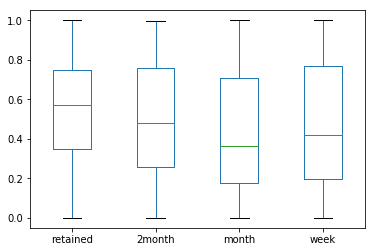

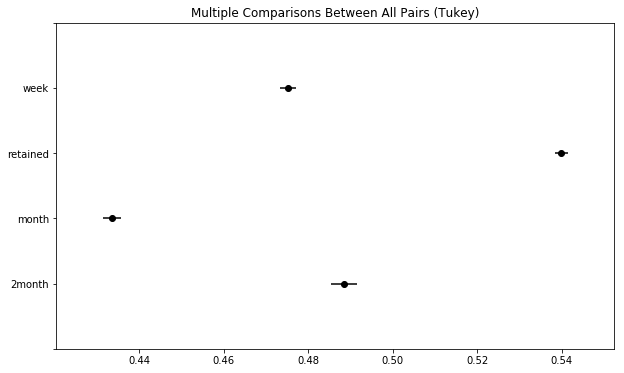

In [197]:
new_variable_checker(merge_party.iloc[:,[0,2,3]],merge_party.iloc[:,2])

### 파티명단에 맨 앞에 있는 경우 집단별 차이, 정규성 검정

/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


'변수 party_first_cnt의 모집단은 정규분포를 따릅니다.'

                df        sum_sq     mean_sq           F  PR(>F)
label          3.0    442.875973  147.625324  1595.79925     0.0
Residual  135022.0  12490.710556    0.092509         NaN     NaN
'통계적으로 네 집단의 차이가 유의함.'
Multiple Comparison of Means - Tukey HSD,FWER=0.10
 group1   group2  meandiff  lower   upper  reject
-------------------------------------------------
 2month   month    0.0916   0.0833   0.1    True 
 2month  retained -0.0356  -0.0427 -0.0284  True 
 2month    week    0.0811   0.0734  0.0888  True 
 month   retained -0.1272  -0.1329 -0.1215  True 
 month     week   -0.0105  -0.0169 -0.0042  True 
retained   week    0.1167   0.1121  0.1213  True 
-------------------------------------------------



array([ True,  True,  True,  True,  True,  True])

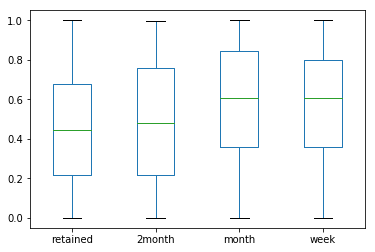

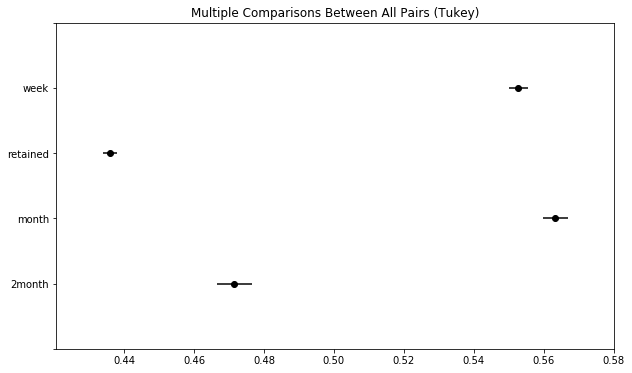

In [193]:
new_variable_checker(merge_first.iloc[:,[0,2,3]],merge_first.iloc[:,2])

/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


'변수 full_party_cnt의 모집단은 정규분포를 따릅니다.'

                df        sum_sq     mean_sq            F  PR(>F)
label          3.0    915.154702  305.051567  3823.141717     0.0
Residual  224397.0  17904.817989    0.079791          NaN     NaN
'통계적으로 네 집단의 차이가 유의함.'
Multiple Comparison of Means - Tukey HSD,FWER=0.10
 group1   group2  meandiff  lower   upper  reject
-------------------------------------------------
 2month   month   -0.1107  -0.1162 -0.1052  True 
 2month  retained  0.0318   0.0269  0.0366  True 
 2month    week   -0.0938   -0.099 -0.0886  True 
 month   retained  0.1425   0.1387  0.1463  True 
 month     week    0.0169   0.0126  0.0211  True 
retained   week   -0.1256   -0.129 -0.1222  True 
-------------------------------------------------



array([ True,  True,  True,  True,  True,  True])

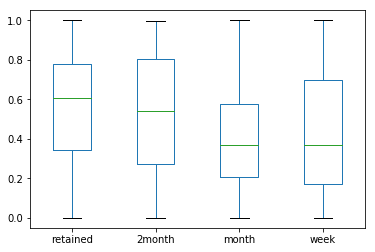

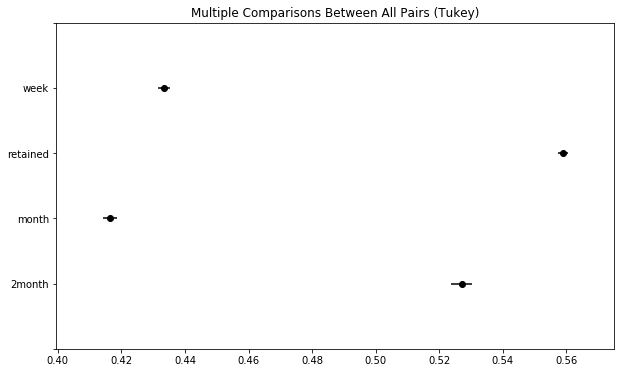

In [194]:
new_variable_checker(merge_full.iloc[:,[0,2,3]],merge_full.iloc[:,2])

### 8분 이상 지속된 파티 참여횟수 집단별 차이, 정규성 검정

/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


'변수 party_over8_cnt의 모집단은 정규분포를 따릅니다.'

                df        sum_sq     mean_sq            F  PR(>F)
label          3.0   1126.303657  375.434552  4726.325686     0.0
Residual  232160.0  18441.574160    0.079435          NaN     NaN
'통계적으로 네 집단의 차이가 유의함.'
Multiple Comparison of Means - Tukey HSD,FWER=0.10
 group1   group2  meandiff  lower   upper  reject
-------------------------------------------------
 2month   month   -0.1024  -0.1077  -0.097  True 
 2month  retained  0.0526   0.0479  0.0574  True 
 2month    week   -0.0869   -0.092 -0.0819  True 
 month   retained  0.155    0.1513  0.1587  True 
 month     week    0.0154   0.0113  0.0196  True 
retained   week   -0.1396  -0.1429 -0.1363  True 
-------------------------------------------------



array([ True,  True,  True,  True,  True,  True])

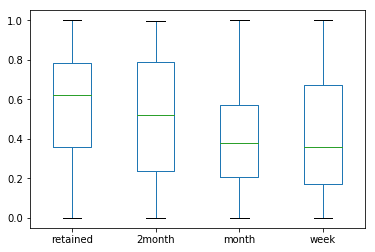

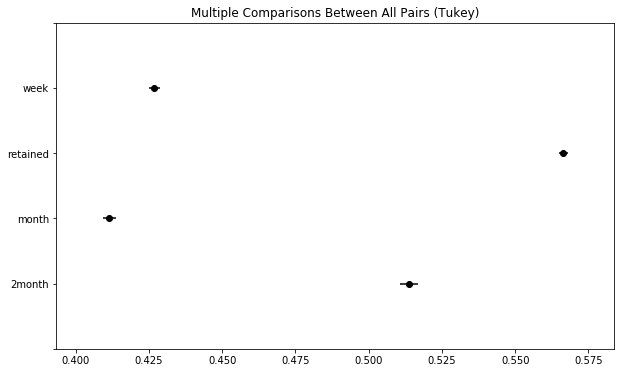

In [195]:
new_variable_checker(merge_party_over.iloc[:,[0,2,3]],merge_party_over.iloc[:,2])

### 4인 파티 참여횟수 집단별 차이, 정규성 검정

/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


'변수 party_cnt_4의 모집단은 정규분포를 따릅니다.'

               df       sum_sq    mean_sq          F        PR(>F)
label         3.0    38.404914  12.801638  83.307418  9.731296e-54
Residual  43090.0  6621.530139   0.153667        NaN           NaN
'통계적으로 네 집단의 차이가 유의함.'
Multiple Comparison of Means - Tukey HSD,FWER=0.10
 group1   group2  meandiff  lower   upper  reject
-------------------------------------------------
 2month   month    -0.009  -0.0295  0.0116 False 
 2month  retained  0.0407   0.0237  0.0577  True 
 2month    week   -0.0403  -0.0604 -0.0201  True 
 month   retained  0.0497   0.036   0.0634  True 
 month     week   -0.0313  -0.0487 -0.0139  True 
retained   week    -0.081   -0.094 -0.0679  True 
-------------------------------------------------



array([False,  True,  True,  True,  True,  True])

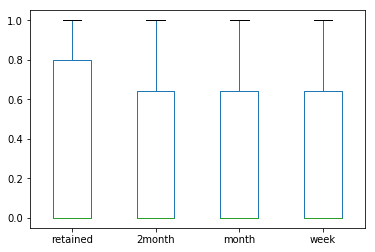

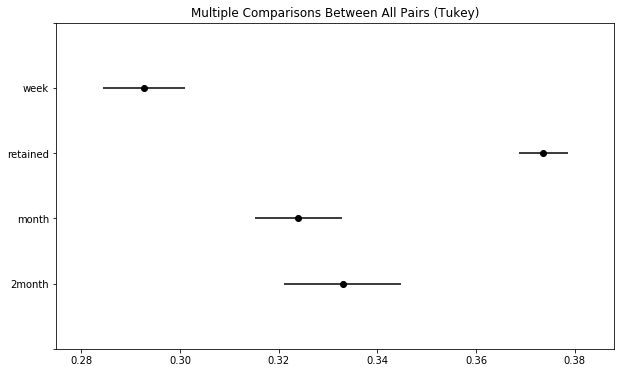

In [196]:

new_variable_checker(merge_4.iloc[:,[0,2,3]],merge_4.iloc[:,2])

### 파티 참여횟수- 실제 던전을 돈 횟수  집단별 차이, 정규성 검정

/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


'변수 differ의 모집단은 정규분포를 따릅니다.'

                df        sum_sq     mean_sq           F  PR(>F)
label          3.0   1349.373550  449.791183  5797.83764     0.0
Residual  240020.0  18620.542097    0.077579         NaN     NaN
'통계적으로 네 집단의 차이가 유의함.'
Multiple Comparison of Means - Tukey HSD,FWER=0.10
 group1   group2  meandiff  lower   upper  reject
-------------------------------------------------
 2month   month    0.1023   0.0972  0.1075  True 
 2month  retained -0.0401  -0.0447 -0.0355  True 
 2month    week    0.1249    0.12   0.1297  True 
 month   retained -0.1424   -0.146 -0.1388  True 
 month     week    0.0225   0.0185  0.0265  True 
retained   week    0.165    0.1618  0.1682  True 
-------------------------------------------------



array([ True,  True,  True,  True,  True,  True])

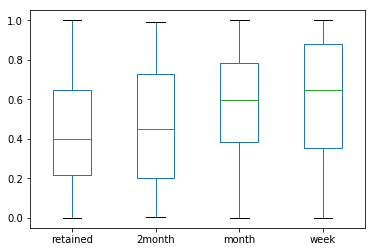

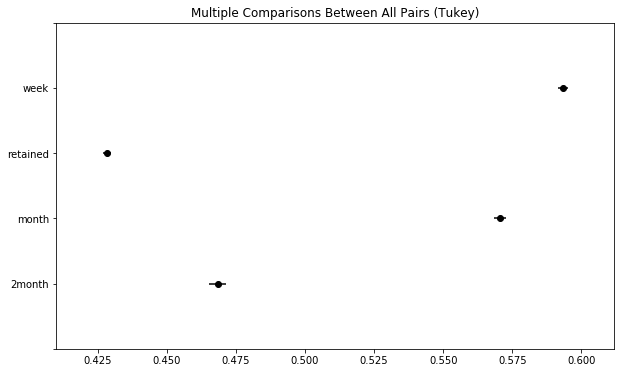

In [191]:
new_variable_checker(merge_diff.iloc[:,[0,2,3]],merge_diff.iloc[:,2])

## 결론

> 생성한 6개 변수 모두 유의하다고 판단. 변수에 투입하기로 결정